In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os

In [30]:
path_data = '/Users/chi/Documents/Data/ARGO/'
filename = 'Argo_mixedlayers_monthlyclim_04142022.nc'
ds = nc.Dataset(path_data + filename)
print(ds)
longrid = ds.variables['longrid'][:]
latgrid = ds.variables['latgrid'][:]
lon = ds.variables['lon'][:]
lat = ds.variables['lat'][:]
month = ds.variables['month'][:]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    description: This file was created using 
 matlab R2011b with NETCDF Library Functions

    date: [730848.53015047 730848.88790506 730849.28543982 ... 738591.19513889
 738603.2625     738613.26180556]
    dimensions(sizes): iMONTH(12), iLON(360), iLAT(180), iTXT(110)
    variables(dimensions): float64 lat(iLAT), float64 lon(iLON), float64 month(iMONTH), float64 mld_da_mean(iLAT, iLON, iMONTH), float64 mld_dt_mean(iLAT, iLON, iMONTH), float64 mld_da_median(iLAT, iLON, iMONTH), float64 mld_dt_median(iLAT, iLON, iMONTH), float64 mld_da_std(iLAT, iLON, iMONTH), float64 mld_dt_std(iLAT, iLON, iMONTH), float64 mld_da_max(iLAT, iLON, iMONTH), float64 mld_dt_max(iLAT, iLON, iMONTH), float64 mlpd_da(iLAT, iLON, iMONTH), float64 mlpd_dt(iLAT, iLON, iMONTH), float64 mlt_da(iLAT, iLON, iMONTH), float64 mlt_dt(iLAT, iLON, iMONTH), float64 mls_da(iLAT, iLON, iMONTH), float64 mls_dt(iLAT, iLON, iMONTH

<Figure size 432x288 with 0 Axes>

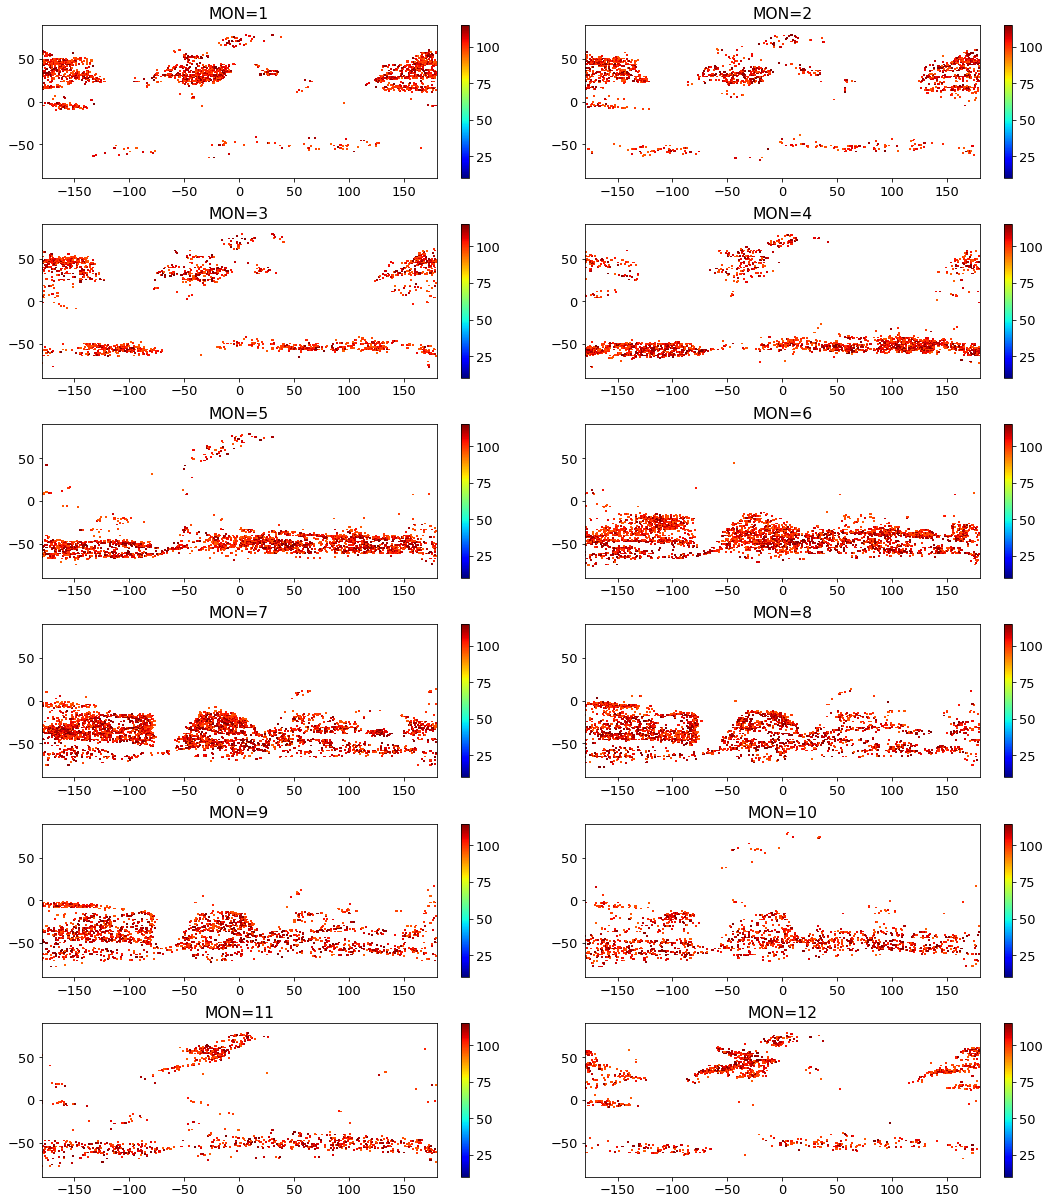

In [ ]:
### plot 12 maps - monthly MLD
cmap = 'jet'
nrow = 6
ncol = 2
varnm_plot = 'mld_dt_median'
var_plot = ds.variables[varnm_plot][:]
### plot
plt.clf()
fig, ax = plt.subplots(nrows=nrow, ncols=ncol)
plt.gcf().set_size_inches(18, 20)
plt.rcParams.update({'font.size': 13})
###
nsub = 0
for irow in range(nrow):
    for icol in range(ncol):
        nsub = nsub + 1
        plt.subplot(nrow, ncol, nsub)
        data = np.squeeze( var_plot[:,:,nsub-1] )
        cs = plt.pcolor(lon, lat, data, cmap=cmap, vmin=95, vmax=115)
        plt.colorbar()
        plt.title('MON={:.0f}'.format(month[nsub-1]))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.1,hspace=0.3)

116 114
[-- -- -- -- -- -- -- -- -- -- -- --]


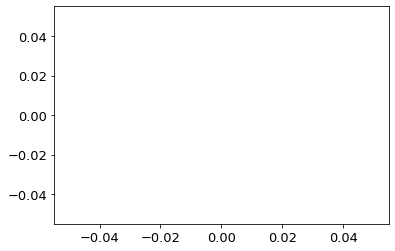

In [39]:
ilat = np.argmin( np.abs(lat-27) )
ilon = np.argmin( np.abs(lon-(-65)))
print(ilat, ilon)
data = np.squeeze( var_plot[ilat,ilon,np.arange(0,len(month))] )
print(data)
plt.plot(month, data)